# Модуль 4 Разработка решения для задачи с большими данными.
# Загрузка и предварительная обработка данных.
# Оптимизация данных

## 1. Загрузка и предобработка больших данных

In [129]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import subprocess
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import os

In [104]:
def feature_importance_random_forest(df, target_column):
    """
    Функция для оценки важности признаков с помощью Random Forest.

    Параметры:
    df (pd.DataFrame): Входной DataFrame, содержащий данные.
    target_column (str): Название столбца с целевой переменной.

    Возвращает:
    feature_importances (pd.Series): Серия с важностью признаков.
    """
    # Разделение данных на признаки и целевую переменную
    X = df.drop(columns=[target_column])
    y = df[target_column]

    # Создание и обучение модели Random Forest
    model = RandomForestRegressor(random_state=42)
    model.fit(X, y)

    # Получение важности признаков
    feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

    # Визуализация важности признаков
    plt.figure(figsize=(10, 6))
    feature_importances.plot(kind='bar', color='skyblue')
    plt.title('Feature Importances using Random Forest')
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.show()

    return feature_importances

# Пример использования функции
# df = pd.read_csv('your_data.csv')
# feature_importances = feature_importance_random_forest(df, target_column='target')


In [14]:
def optimize_dataframe(df):
    """
    Функция для оптимизации типов данных в DataFrame.
    
    Параметры:
        df (pd.DataFrame): Исходный DataFrame.
    
    Возвращает:
        pd.DataFrame: DataFrame с оптимизированными типами данных.
    """
    # Копируем исходный DataFrame
    optimized_df = df.copy()
    
    # Определяем начальный размер DataFrame
    initial_memory = df.memory_usage(deep=True).sum() / 1024**2  # Размер в мегабайтах
    
    print(f"Начальный размер DataFrame: {initial_memory:.2f} MB")
    
    for col in optimized_df.columns:
        col_type = optimized_df[col].dtype
        
        # Если столбец числовой (int или float)
        if np.issubdtype(col_type, np.number):
            # Для целочисленных типов
            if np.issubdtype(col_type, np.integer):
                min_val = optimized_df[col].min()
                max_val = optimized_df[col].max()
                
                if min_val >= 0:
                    if max_val <= np.iinfo(np.uint8).max:
                        optimized_df[col] = optimized_df[col].astype(np.uint8)
                    elif max_val <= np.iinfo(np.uint16).max:
                        optimized_df[col] = optimized_df[col].astype(np.uint16)
                    elif max_val <= np.iinfo(np.uint32).max:
                        optimized_df[col] = optimized_df[col].astype(np.uint32)
                    else:
                        optimized_df[col] = optimized_df[col].astype(np.uint64)
                else:
                    if min_val >= np.iinfo(np.int8).min and max_val <= np.iinfo(np.int8).max:
                        optimized_df[col] = optimized_df[col].astype(np.int8)
                    elif min_val >= np.iinfo(np.int16).min and max_val <= np.iinfo(np.int16).max:
                        optimized_df[col] = optimized_df[col].astype(np.int16)
                    elif min_val >= np.iinfo(np.int32).min and max_val <= np.iinfo(np.int32).max:
                        optimized_df[col] = optimized_df[col].astype(np.int32)
                    else:
                        optimized_df[col] = optimized_df[col].astype(np.int64)
            
            # Для вещественных типов
            elif np.issubdtype(col_type, np.floating):
                optimized_df[col] = pd.to_numeric(optimized_df[col], downcast='float')
        
        # Если столбец строковый
        elif col_type == 'object':
            num_unique_values = len(optimized_df[col].unique())
            num_total_values = len(optimized_df[col])
            
            # Если уникальных значений мало, преобразуем в категорию
            if num_unique_values / num_total_values < 0.5:
                optimized_df[col] = optimized_df[col].astype('category')
    
    # Определяем конечный размер DataFrame
    final_memory = optimized_df.memory_usage(deep=True).sum() / 1024**2  # Размер в мегабайтах
    reduction = (initial_memory - final_memory) / initial_memory * 100  # Процент уменьшения
    
    print(f"Конечный размер DataFrame: {final_memory:.2f} MB")
    print(f"Размер уменьшился на: {reduction:.2f}%")
    
    return optimized_df

In [151]:
def optimize_dataframe2(df):
    """
    Функция для оптимизации типов данных в DataFrame.
    
    Параметры:
        df (pd.DataFrame): Исходный DataFrame.
    
    Возвращает:
        pd.DataFrame: DataFrame с оптимизированными типами данных.
    """
    # Копируем исходный DataFrame
    optimized_df = df.copy()
    
    # Определяем начальный размер DataFrame
    initial_memory = df.memory_usage(deep=True).sum() / 1024**2  # Размер в мегабайтах
    
    print(f"Начальный размер DataFrame: {initial_memory:.2f} MB")
    
    # Берем первые 10,000 строк для анализа
    sample_size = min(10000, len(df))  # Учитываем случаи, когда строк меньше 10,000
    sample_df = df.iloc[:sample_size]
    
    for col in optimized_df.columns:
        col_type = sample_df[col].dtype
        
        # Если столбец числовой (int или float)
        if np.issubdtype(col_type, np.number):
            # Для целочисленных типов
            if np.issubdtype(col_type, np.integer):
                min_val = sample_df[col].min()
                max_val = sample_df[col].max()
                
                if min_val >= 0:
                    if max_val <= np.iinfo(np.uint8).max:
                        optimized_df[col] = optimized_df[col].astype(np.uint8)
                    elif max_val <= np.iinfo(np.uint16).max:
                        optimized_df[col] = optimized_df[col].astype(np.uint16)
                    elif max_val <= np.iinfo(np.uint32).max:
                        optimized_df[col] = optimized_df[col].astype(np.uint32)
                    else:
                        optimized_df[col] = optimized_df[col].astype(np.uint64)
                else:
                    if min_val >= np.iinfo(np.int8).min and max_val <= np.iinfo(np.int8).max:
                        optimized_df[col] = optimized_df[col].astype(np.int8)
                    elif min_val >= np.iinfo(np.int16).min and max_val <= np.iinfo(np.int16).max:
                        optimized_df[col] = optimized_df[col].astype(np.int16)
                    elif min_val >= np.iinfo(np.int32).min and max_val <= np.iinfo(np.int32).max:
                        optimized_df[col] = optimized_df[col].astype(np.int32)
                    else:
                        optimized_df[col] = optimized_df[col].astype(np.int64)
            
            # Для вещественных типов
            elif np.issubdtype(col_type, np.floating):
                optimized_df[col] = pd.to_numeric(optimized_df[col], downcast='float')
        
        # Если столбец строковый
        elif col_type == 'object':
            num_unique_values = len(sample_df[col].unique())
            num_total_values = len(sample_df[col])
            
            # Если уникальных значений мало, преобразуем в категорию
            if num_unique_values / num_total_values < 0.5:
                optimized_df[col] = optimized_df[col].astype('category')
    
    # Определяем конечный размер DataFrame
    final_memory = optimized_df.memory_usage(deep=True).sum() / 1024**2  # Размер в мегабайтах
    reduction = (initial_memory - final_memory) / initial_memory * 100  # Процент уменьшения
    
    print(f"Конечный размер DataFrame: {final_memory:.2f} MB")
    print(f"Размер уменьшился на: {reduction:.2f}%")
    
    return optimized_df

In [8]:
def load_csv(file_path, num_rows=0):
    """
    Загружает данные из CSV-файла в DataFrame.

    Параметры:
        file_path (str): Путь к CSV-файлу.
        num_rows (int): Количество строк для загрузки. Если 0, загружается весь файл.

    Возвращает:
        pd.DataFrame: DataFrame с данными из файла.
    """
    try:
        # Если num_rows == 0, загружаем весь файл
        if num_rows == 0:
            df = pd.read_csv(file_path)
        else:
            # Иначе загружаем указанное количество строк
            df = pd.read_csv(file_path, nrows=num_rows)
        
        return df
    except Exception as e:
        print(f"Произошла ошибка при чтении файла: {e}")
        return None

In [22]:
def count_lines_in_file(file_path):
    """
    Подсчитывает количество строк в файле с помощью команды `wc -l`.

    :param file_path: Путь к файлу.
    :return: Количество строк в файле.
    """
    try:
        # Выполняем команду wc -l через subprocess
        result = subprocess.run(['wc', '-l', file_path], stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)
        
        # Проверяем, что команда выполнилась успешно
        if result.returncode != 0:
            raise RuntimeError(f"Ошибка при выполнении команды: {result.stderr.strip()}")
        
        # Извлекаем количество строк из вывода команды
        row_count = int(result.stdout.split()[0])
        return row_count
    
    except FileNotFoundError:
        raise FileNotFoundError(f"Файл '{file_path}' не найден.")
    except Exception as e:
        raise RuntimeError(f"Произошла ошибка: {str(e)}")

In [11]:
def plot_distributions(df, bins=30, color='blue'):
    """
    Функция для построения графиков распределений для всех числовых столбцов в DataFrame.

    Параметры:
    df (pd.DataFrame): Входной DataFrame, содержащий данные.
    bins (int): Количество интервалов (бинов) для гистограммы (по умолчанию 30).
    color (str): Цвет графика (по умолчанию 'blue').
    """
    # Установка стиля seaborn
    sns.set(style="whitegrid")

    # Определение числовых столбцов
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

    # Создание графиков распределений для каждого числового столбца
    for column in numeric_columns:
        plt.figure(figsize=(8, 4))  # Размер графика
        sns.histplot(df[column], kde=True, bins=bins, color=color)  # Гистограмма с KDE
        plt.title(f'Distribution of {column}')  # Заголовок графика
        plt.xlabel(column)  # Подпись оси X
        plt.ylabel('Frequency')  # Подпись оси Y
        plt.show()  # Отображение графика

### 1. Загружены данные из файлов df_{x} и target_{x}, где x – порядковый номер файла, а также df_val и target_val

Проверим что у нас вообще хранится в файлах. Для этого возьмем маленький кусок

In [40]:
df = load_csv('/home/c6/Загрузки/BIG DATA/df_0.csv',10000)
print(df)

               0         1         2         3         4         5         6  \
0     968.494255 -0.238016  2.019547  0.491340  0.535348  4.629481 -3.483024   
1     746.666227 -0.522473  1.315388  0.551132  0.503090  3.120480  1.505452   
2     347.394721 -0.616824  1.279916  0.162176  0.015601  0.884350  8.518826   
3     516.437250 -2.676617  1.726308  0.296178  0.437327  3.401815 -1.238423   
4     866.503711 -0.446574  2.106271  0.282294  0.496367  1.630669 -3.764425   
...          ...       ...       ...       ...       ...       ...       ...   
9995  918.328644 -1.004958  1.623597  0.776809  1.418864  3.294638  1.103772   
9996  745.476989 -0.232724  1.865297  0.146166  0.890447  4.112978  1.463950   
9997  136.236169 -4.339350  1.980554  0.111960  1.056028  2.908751 -1.235301   
9998  923.778720 -0.767027  2.574805  0.614267  0.297316  1.414977  3.058268   
9999  943.565579 -1.116818  1.364188  0.394647  1.335031  0.229908  5.618507   

             7         8         9  ...

Мы загружаем данные из файлов используя chunksize из библиотеки pandas. Этот параметр позволяет читать файл по частям (chunks), что значительно снижает нагрузку на память

In [96]:
chunk_size = 1_000_000

df_0 = pd.read_csv('/home/c6/Загрузки/BIG DATA/df_0.csv', chunksize=chunk_size)
df_1 = pd.read_csv('/home/c6/Загрузки/BIG DATA/df_1.csv', chunksize=chunk_size)
df_2 = pd.read_csv('/home/c6/Загрузки/BIG DATA/df_2.csv', chunksize=chunk_size)
df_3 = pd.read_csv('/home/c6/Загрузки/BIG DATA/df_3.csv', chunksize=chunk_size)
target_0 = pd.read_csv('/home/c6/Загрузки/BIG DATA/target_0.csv', chunksize=chunk_size)
target_1 = pd.read_csv('/home/c6/Загрузки/BIG DATA/target_1.csv', chunksize=chunk_size)
target_2 = pd.read_csv('/home/c6/Загрузки/BIG DATA/target_2.csv', chunksize=chunk_size)
target_3 = pd.read_csv('/home/c6/Загрузки/BIG DATA/target_3.csv', chunksize=chunk_size)
df_val = pd.read_csv('/home/c6/Загрузки/BIG DATA/df_val.csv', chunksize=chunk_size)
target_val = pd.read_csv('/home/c6/Загрузки/BIG DATA/target_val.csv', chunksize=chunk_size)


### 2. Проведен анализ и предобработка загруженных данных, включая:

In [95]:
next(df_0).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 30 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   0       1000000 non-null  float64
 1   1       1000000 non-null  float64
 2   2       1000000 non-null  float64
 3   3       1000000 non-null  float64
 4   4       1000000 non-null  float64
 5   5       1000000 non-null  float64
 6   6       1000000 non-null  float64
 7   7       1000000 non-null  float64
 8   8       1000000 non-null  float64
 9   9       1000000 non-null  float64
 10  10      1000000 non-null  float64
 11  11      1000000 non-null  float64
 12  12      1000000 non-null  float64
 13  13      1000000 non-null  float64
 14  14      1000000 non-null  float64
 15  15      1000000 non-null  float64
 16  16      1000000 non-null  float64
 17  17      1000000 non-null  float64
 18  18      1000000 non-null  float64
 19  19      1000000 non-null  float64
 20  20      1000000 non-null 

In [48]:
next(df_1).info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 1000000 to 1999999
Data columns (total 30 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   0       1000000 non-null  float64
 1   1       1000000 non-null  float64
 2   2       1000000 non-null  float64
 3   3       1000000 non-null  float64
 4   4       1000000 non-null  float64
 5   5       1000000 non-null  float64
 6   6       1000000 non-null  float64
 7   7       1000000 non-null  float64
 8   8       1000000 non-null  float64
 9   9       1000000 non-null  float64
 10  10      1000000 non-null  float64
 11  11      1000000 non-null  float64
 12  12      1000000 non-null  float64
 13  13      1000000 non-null  float64
 14  14      1000000 non-null  float64
 15  15      1000000 non-null  float64
 16  16      1000000 non-null  float64
 17  17      1000000 non-null  float64
 18  18      1000000 non-null  float64
 19  19      1000000 non-null  float64
 20  20      1000000 no

In [49]:
next(df_2).info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 1000000 to 1999999
Data columns (total 30 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   0       1000000 non-null  float64
 1   1       1000000 non-null  float64
 2   2       1000000 non-null  float64
 3   3       1000000 non-null  float64
 4   4       1000000 non-null  float64
 5   5       1000000 non-null  float64
 6   6       1000000 non-null  float64
 7   7       1000000 non-null  float64
 8   8       1000000 non-null  float64
 9   9       1000000 non-null  float64
 10  10      1000000 non-null  float64
 11  11      1000000 non-null  float64
 12  12      1000000 non-null  float64
 13  13      1000000 non-null  float64
 14  14      1000000 non-null  float64
 15  15      1000000 non-null  float64
 16  16      1000000 non-null  float64
 17  17      1000000 non-null  float64
 18  18      1000000 non-null  float64
 19  19      1000000 non-null  float64
 20  20      1000000 no

In [50]:
next(df_3).info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 1000000 to 1999999
Data columns (total 30 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   0       1000000 non-null  float64
 1   1       1000000 non-null  float64
 2   2       1000000 non-null  float64
 3   3       1000000 non-null  float64
 4   4       1000000 non-null  float64
 5   5       1000000 non-null  float64
 6   6       1000000 non-null  float64
 7   7       1000000 non-null  float64
 8   8       1000000 non-null  float64
 9   9       1000000 non-null  float64
 10  10      1000000 non-null  float64
 11  11      1000000 non-null  float64
 12  12      1000000 non-null  float64
 13  13      1000000 non-null  float64
 14  14      1000000 non-null  float64
 15  15      1000000 non-null  float64
 16  16      1000000 non-null  float64
 17  17      1000000 non-null  float64
 18  18      1000000 non-null  float64
 19  19      1000000 non-null  float64
 20  20      1000000 no

In [51]:
next(target_0).info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 1000000 to 1999999
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   0       1000000 non-null  float64
 1   1       1000000 non-null  float64
dtypes: float64(2)
memory usage: 15.3 MB


In [52]:
next(target_1).info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 1000000 to 1999999
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   0       1000000 non-null  float64
 1   1       1000000 non-null  float64
dtypes: float64(2)
memory usage: 15.3 MB


In [53]:
next(target_2).info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 1000000 to 1999999
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   0       1000000 non-null  float64
 1   1       1000000 non-null  float64
dtypes: float64(2)
memory usage: 15.3 MB


In [54]:
next(target_3).info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 1000000 to 1999999
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   0       1000000 non-null  float64
 1   1       1000000 non-null  float64
dtypes: float64(2)
memory usage: 15.3 MB


In [55]:
next(df_val).info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 1000000 to 1999999
Data columns (total 30 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   0       1000000 non-null  float64
 1   1       1000000 non-null  float64
 2   2       1000000 non-null  float64
 3   3       1000000 non-null  float64
 4   4       1000000 non-null  float64
 5   5       1000000 non-null  float64
 6   6       1000000 non-null  float64
 7   7       1000000 non-null  float64
 8   8       1000000 non-null  float64
 9   9       1000000 non-null  float64
 10  10      1000000 non-null  float64
 11  11      1000000 non-null  float64
 12  12      1000000 non-null  float64
 13  13      1000000 non-null  float64
 14  14      1000000 non-null  float64
 15  15      1000000 non-null  float64
 16  16      1000000 non-null  float64
 17  17      1000000 non-null  float64
 18  18      1000000 non-null  float64
 19  19      1000000 non-null  float64
 20  20      1000000 no

In [56]:
next(target_val).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 1000000 to 1999999
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   0       1000000 non-null  float64
 1   1       1000000 non-null  float64
dtypes: float64(2)
memory usage: 15.3 MB


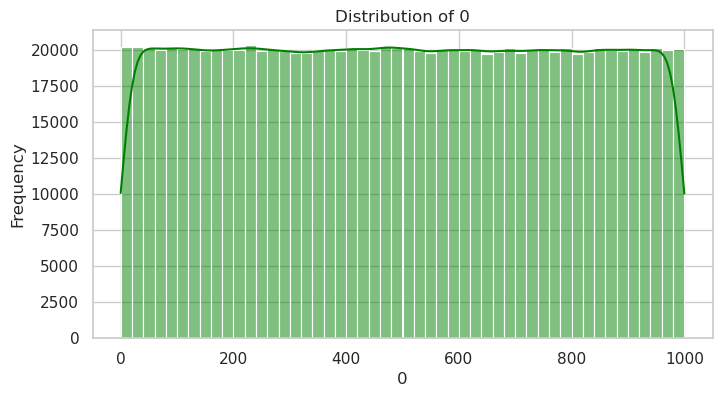

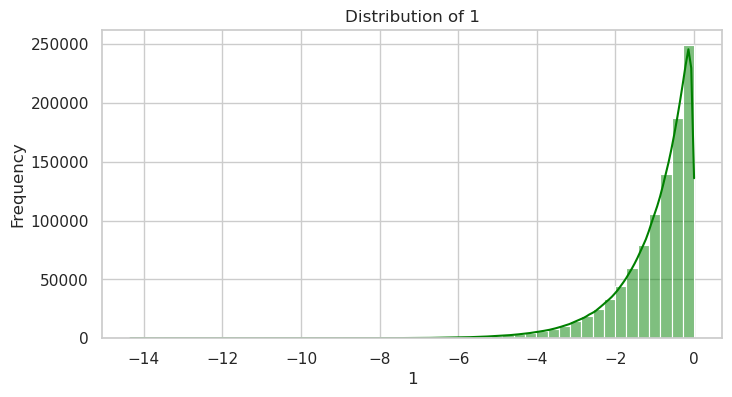

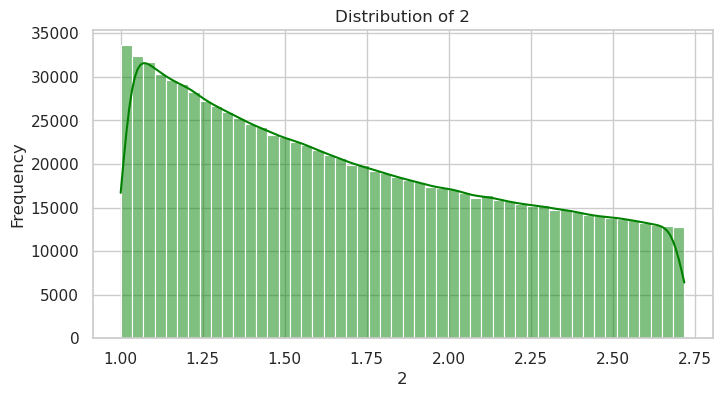

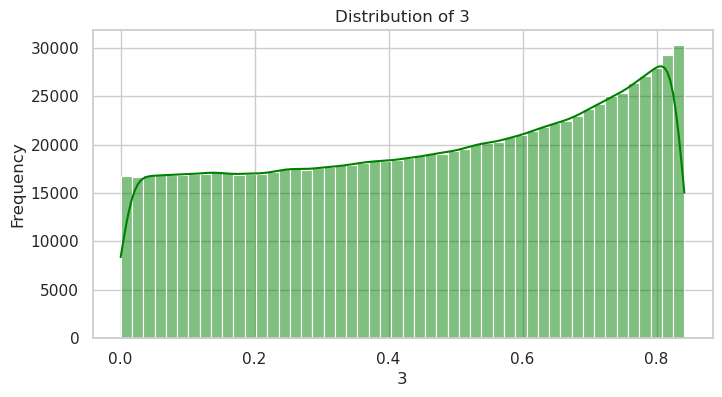

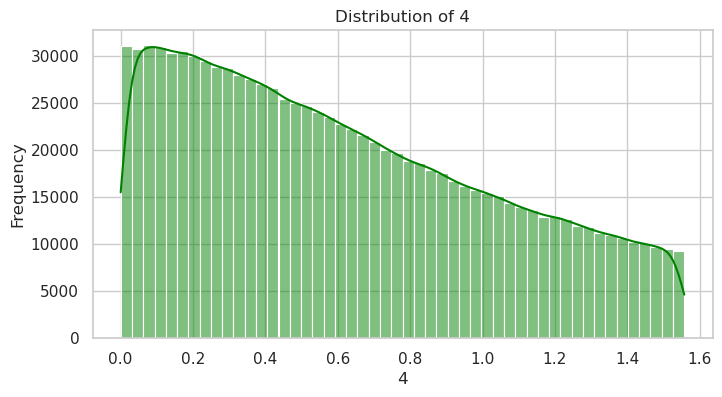

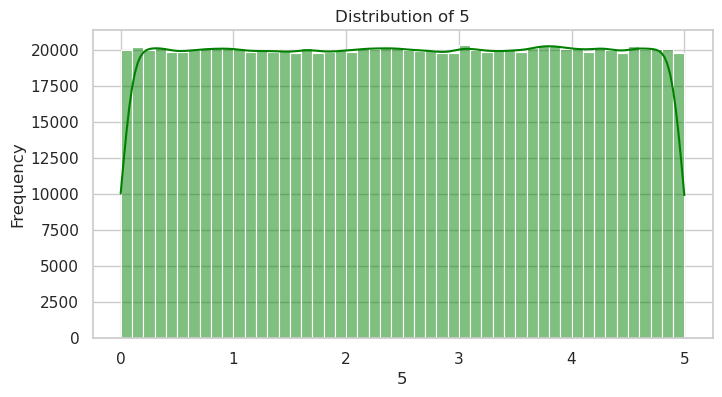

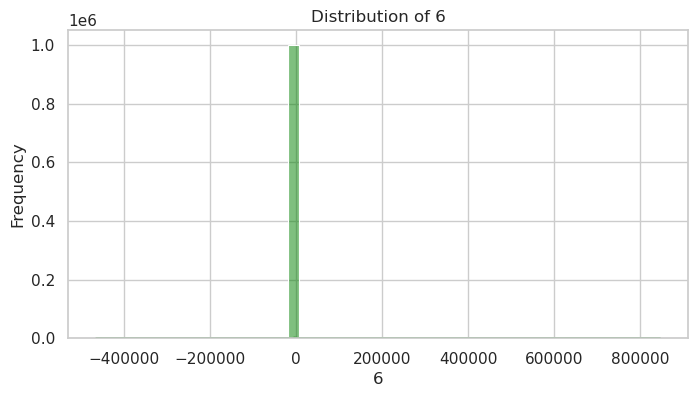

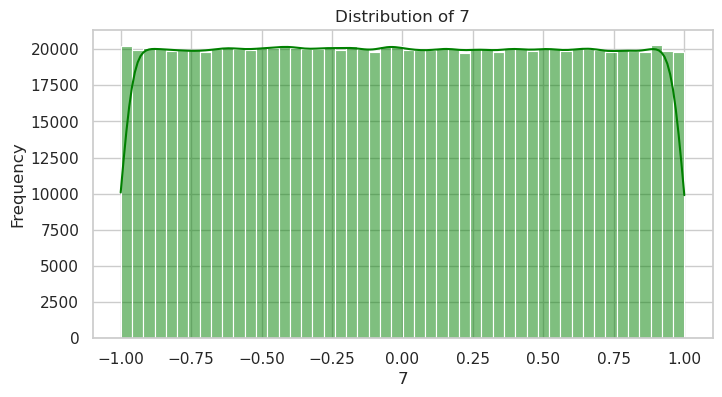

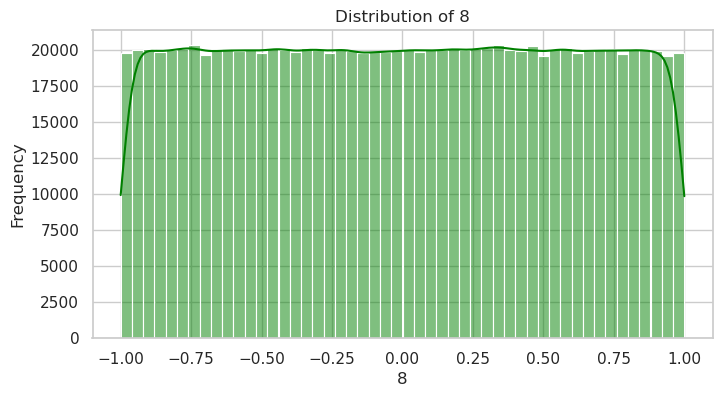

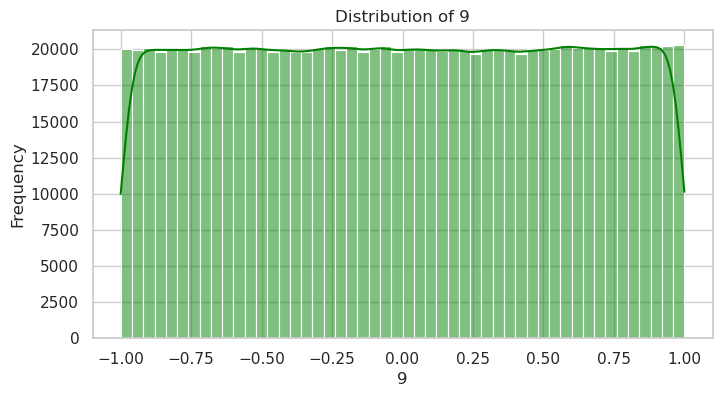

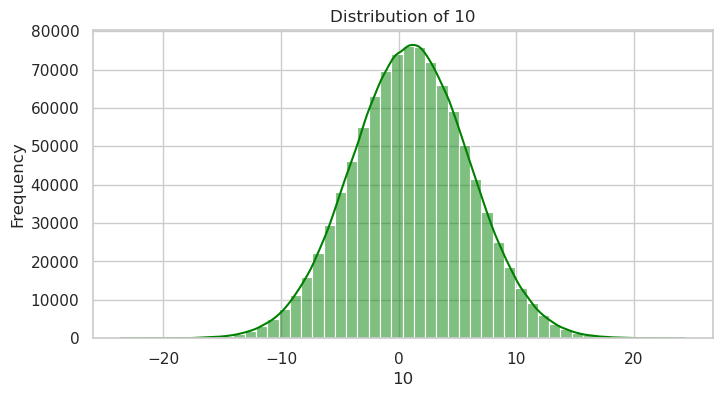

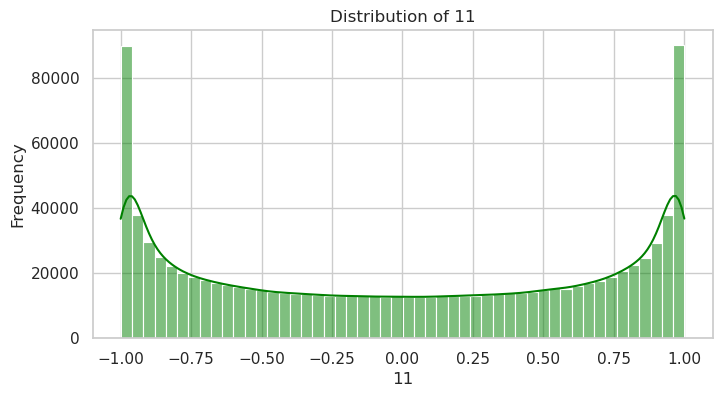

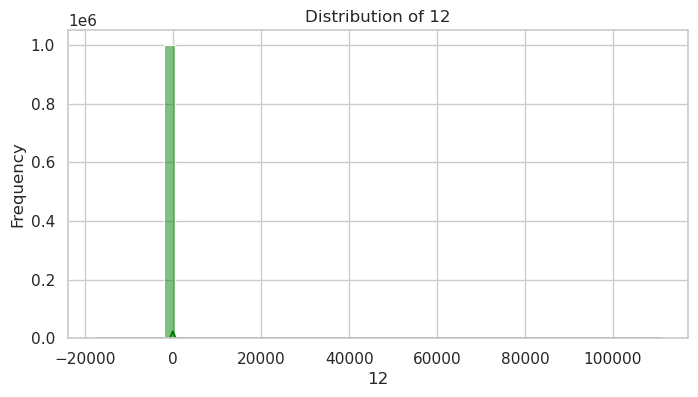

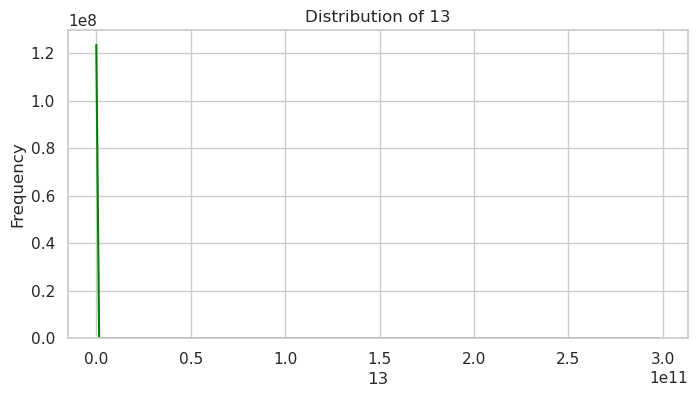

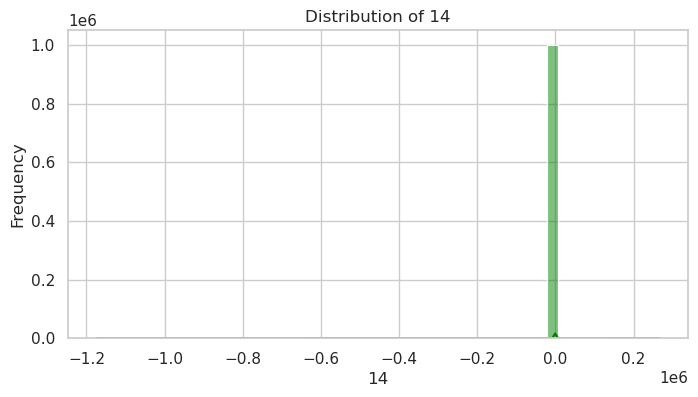

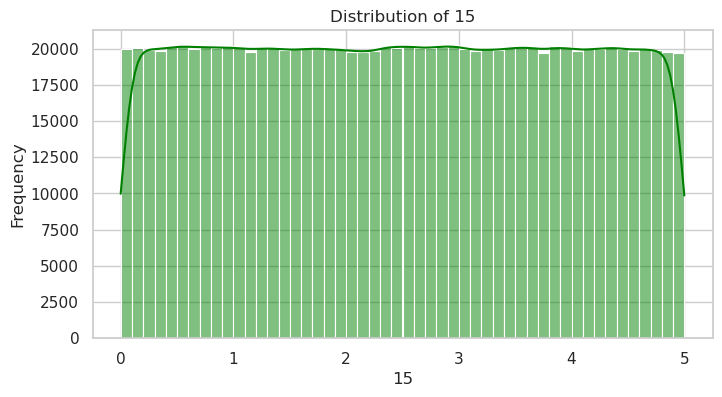

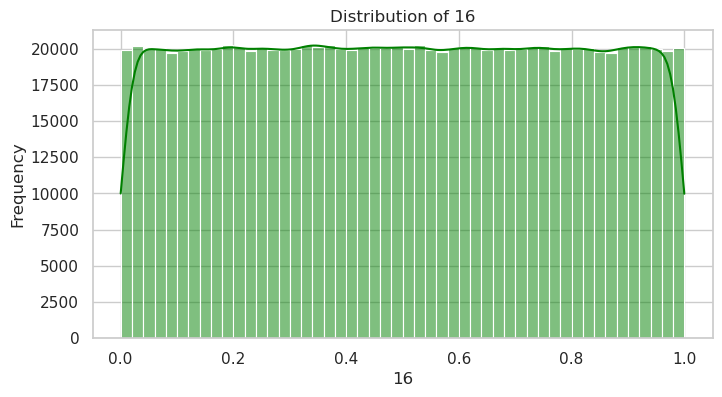

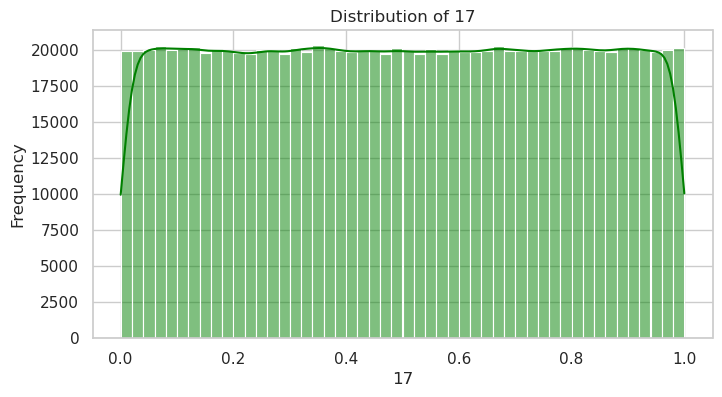

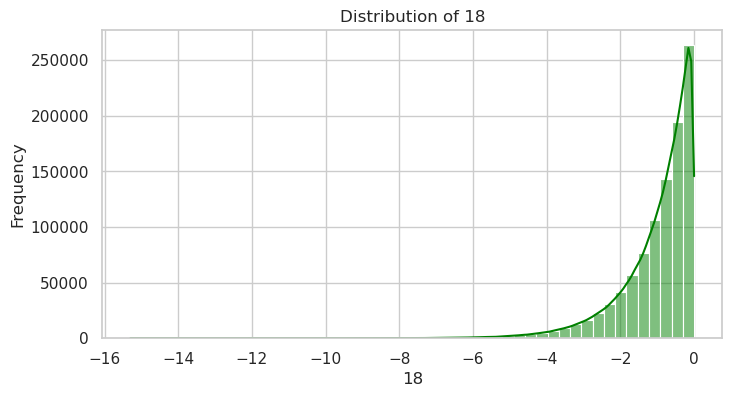

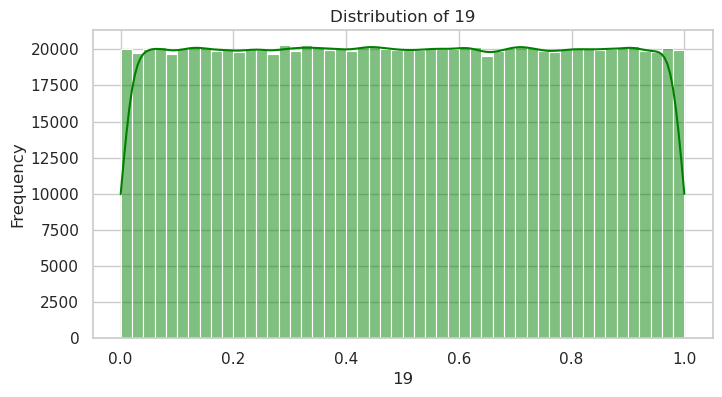

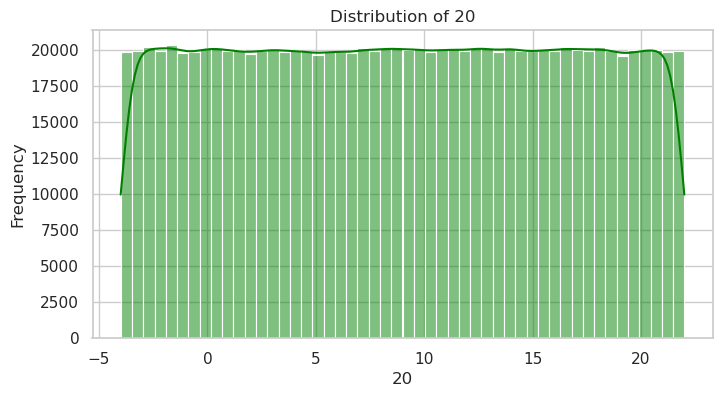

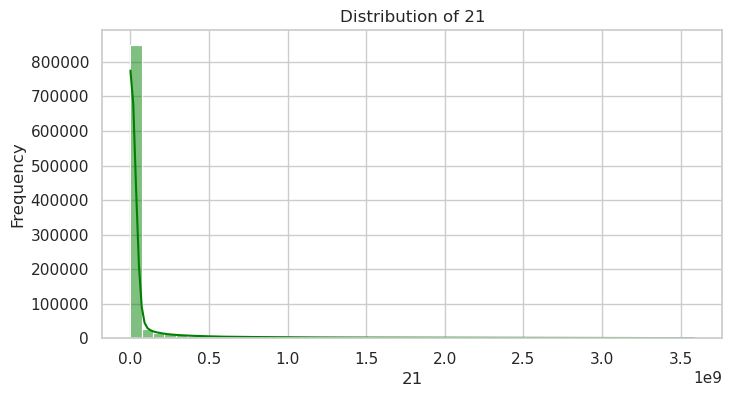

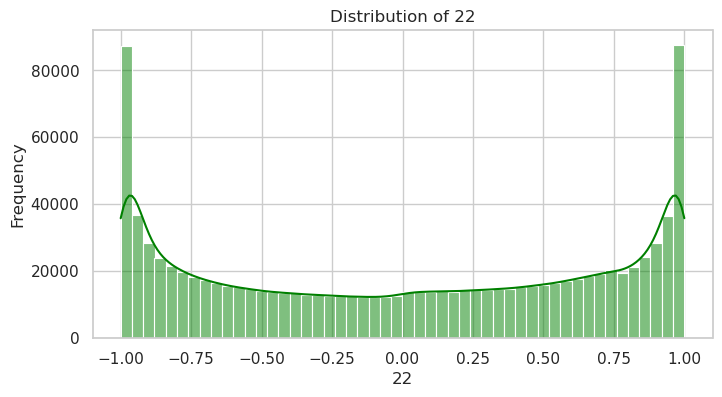

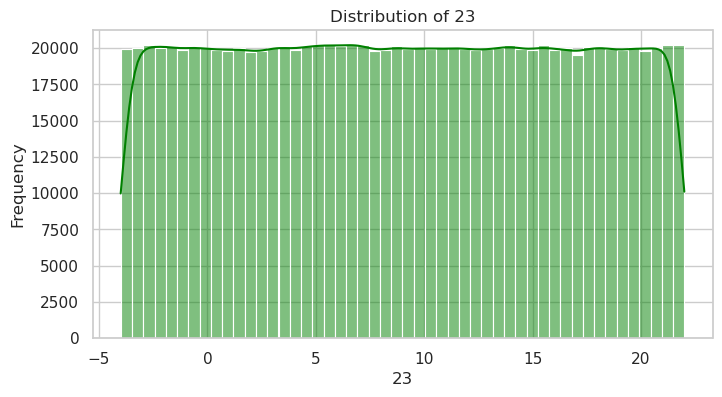

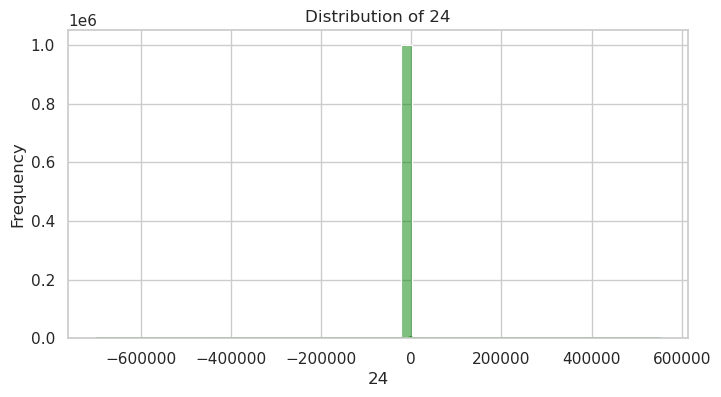

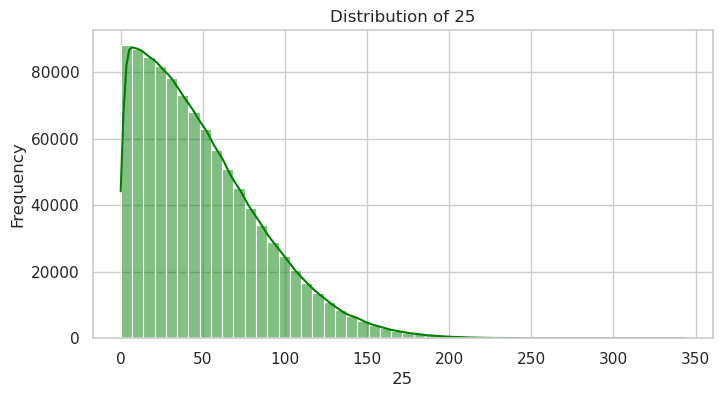

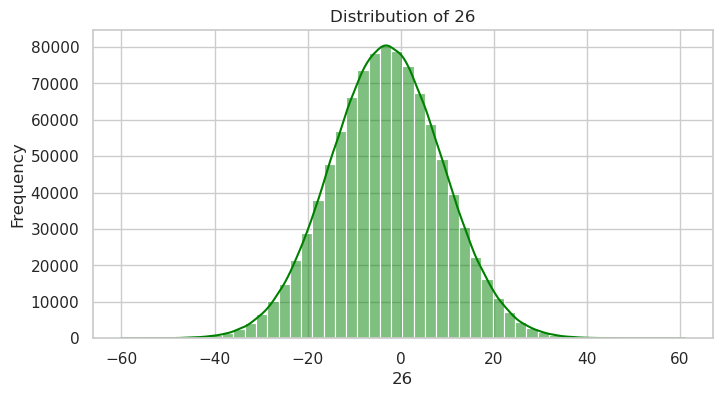

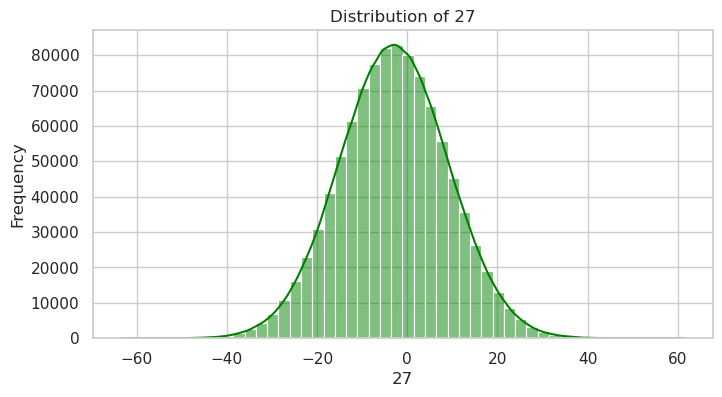

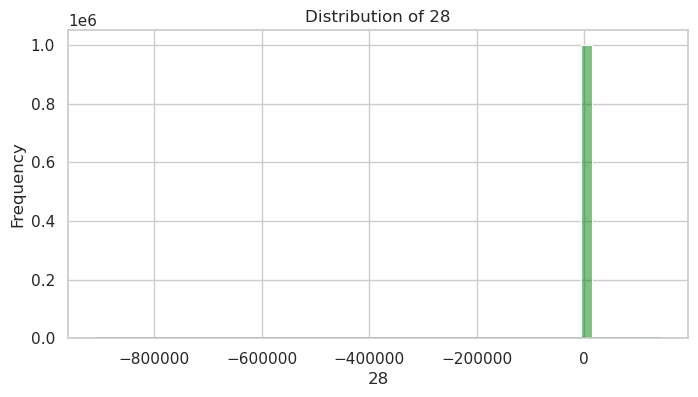

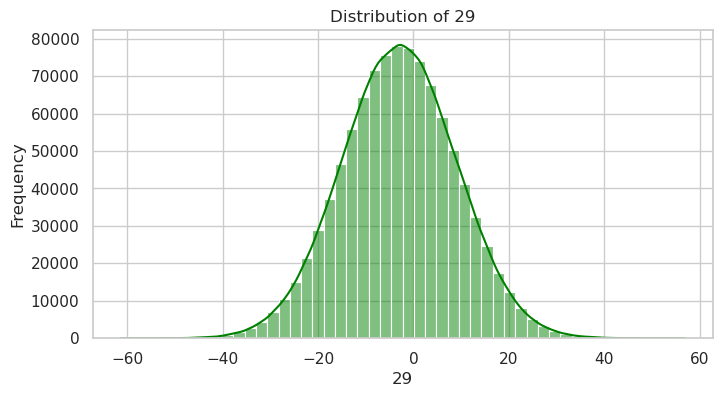

In [57]:
plot_distributions(next(df_0), bins=50, color='green')

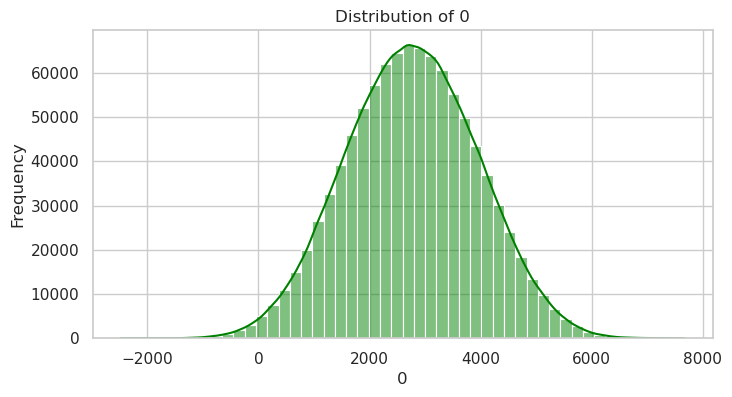

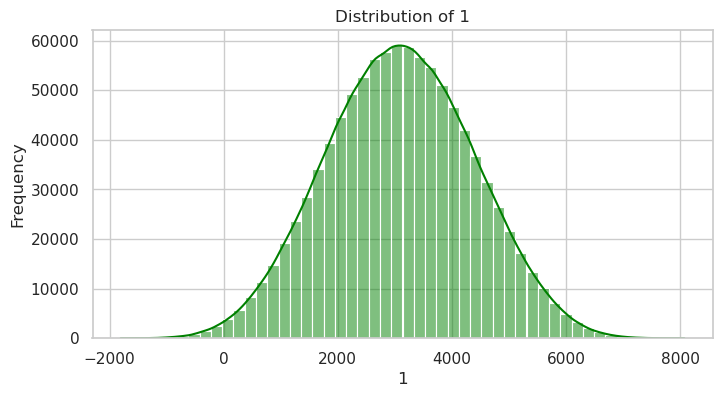

In [61]:
plot_distributions(next(target_0), bins=50, color='green')

In [20]:
optimized_df = optimize_dataframe(df)

Начальный размер DataFrame: 2.29 MB
Конечный размер DataFrame: 1.22 MB
Размер уменьшился на: 46.66%


In [25]:
file_path = '/home/c6/Загрузки/BIG DATA/df_1.csv'
try:
    row_count = count_lines_in_file(file_path)
    print(f"Количество строк в файле '{file_path}': {row_count}")
except Exception as e:
    print(e)

Количество строк в файле '/home/c6/Загрузки/BIG DATA/df_1.csv': 30000001


In [26]:
file_path = '/home/c6/Загрузки/BIG DATA/target_1.csv'
try:
    row_count = count_lines_in_file(file_path)
    print(f"Количество строк в файле '{file_path}': {row_count}")
except Exception as e:
    print(e)

Количество строк в файле '/home/c6/Загрузки/BIG DATA/target_1.csv': 30000001


### Оценку важности признаков

In [67]:
def combine_chunks2(df_iterator, target_iterator):
    for df_chunk, target_chunk in zip(df_iterator, target_iterator):
        # Объединяем чанки по индексу с указанием ключей
        combined_chunk = pd.concat([df_chunk, target_chunk], axis=1, keys=['df', 'target'])
        
        # Переименовываем столбцы, добавляя суффиксы
        combined_chunk.columns = [f'{col[1]}_df' if col[0] == 'df' else f'{col[1]}_target' for col in combined_chunk.columns]
        
        yield combined_chunk

In [115]:
chunk_size = 1_000_000

df_0 = pd.read_csv('/home/c6/Загрузки/BIG DATA/df_0.csv', chunksize=chunk_size)
df_1 = pd.read_csv('/home/c6/Загрузки/BIG DATA/df_1.csv', chunksize=chunk_size)
df_2 = pd.read_csv('/home/c6/Загрузки/BIG DATA/df_2.csv', chunksize=chunk_size)
df_3 = pd.read_csv('/home/c6/Загрузки/BIG DATA/df_3.csv', chunksize=chunk_size)
target_0 = pd.read_csv('/home/c6/Загрузки/BIG DATA/target_0.csv', chunksize=chunk_size)
target_1 = pd.read_csv('/home/c6/Загрузки/BIG DATA/target_1.csv', chunksize=chunk_size)
target_2 = pd.read_csv('/home/c6/Загрузки/BIG DATA/target_2.csv', chunksize=chunk_size)
target_3 = pd.read_csv('/home/c6/Загрузки/BIG DATA/target_3.csv', chunksize=chunk_size)
df_val = pd.read_csv('/home/c6/Загрузки/BIG DATA/df_val.csv', chunksize=chunk_size)
target_val = pd.read_csv('/home/c6/Загрузки/BIG DATA/target_val.csv', chunksize=chunk_size)


In [116]:
# Создаем объединенный итератор
combined_iterator = combine_chunks2(df_0, target_0)

# Проверяем результат: выводим первые строки первого объединенного чанка
for chunk in combined_iterator:
    print(chunk.head())
    first_10000_rows = chunk.head(10000)
    break  # Выводим только первый чанк для проверки

         0_df      1_df      2_df      3_df      4_df      5_df      6_df  \
0  968.494255 -0.238016  2.019547  0.491340  0.535348  4.629481 -3.483024   
1  746.666227 -0.522473  1.315388  0.551132  0.503090  3.120480  1.505452   
2  347.394721 -0.616824  1.279916  0.162176  0.015601  0.884350  8.518826   
3  516.437250 -2.676617  1.726308  0.296178  0.437327  3.401815 -1.238423   
4  866.503711 -0.446574  2.106271  0.282294  0.496367  1.630669 -3.764425   

       7_df      8_df      9_df  ...     22_df      23_df     24_df  \
0  0.250565  0.907312  0.753957  ... -0.201946  -1.996009 -0.565032   
1 -0.146863 -0.986628 -0.485462  ...  0.384998   7.574961 -3.227253   
2 -0.646460  0.069668  0.597678  ... -0.606219   1.242077 -3.474195   
3 -0.376497 -0.242491  0.041539  ... -0.507997  11.702127 -0.579273   
4 -0.021144  0.328130  0.950548  ... -0.835345   2.245303  1.432575   

        25_df      26_df      27_df     28_df      29_df     0_target  \
0   17.195049 -18.093419  -5.193215 -

In [117]:
first_10000_rows

,0_df,1_df,2_df,3_df,4_df,5_df,6_df,7_df,8_df,9_df,...,22_df,23_df,24_df,25_df,26_df,27_df,28_df,29_df,0_target,1_target
0,968.494255,-0.238016,2.019547,0.491340,0.535348,4.629481,-3.483024,0.250565,0.907312,0.753957,...,-0.201946,-1.996009,-0.565032,17.195049,-18.093419,-5.193215,-0.036591,-0.401916,1784.500467,1823.085839
1,746.666227,-0.522473,1.315388,0.551132,0.503090,3.120480,1.505452,-0.146863,-0.986628,-0.485462,...,0.384998,7.574961,-3.227253,113.134778,11.703493,21.841054,-0.059590,17.160748,2907.738623,4051.863643
2,347.394721,-0.616824,1.279916,0.162176,0.015601,0.884350,8.518826,-0.646460,0.069668,0.597678,...,-0.606219,1.242077,-3.474195,60.911892,5.028120,-5.365723,0.201050,-4.534013,1464.805851,2023.473039
3,516.437250,-2.676617,1.726308,0.296178,0.437327,3.401815,-1.238423,-0.376497,-0.242491,0.041539,...,-0.507997,11.702127,-0.579273,116.612848,-15.608584,0.585719,-0.134726,9.471887,2717.503556,2665.618322
4,866.503711,-0.446574,2.106271,0.282294,0.496367,1.630669,-3.764425,-0.021144,0.328130,0.950548,...,-0.835345,2.245303,1.432575,12.964935,-1.676495,-19.580585,-0.112087,4.588833,2597.352423,3598.380682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,918.328644,-1.004958,1.623597,0.776809,1.418864,3.294638,1.103772,-0.136268,0.626034,0.627984,...,-0.207893,12.566185,7.187175,15.156941,-11.952343,1.197372,-0.063611,9.729884,3441.133931,4129.568661
9996,745.476989,-0.232724,1.865297,0.146166,0.890447,4.112978,1.463950,-0.145226,-0.295868,-0.911571,...,-0.968418,12.354400,-0.845899,23.242249,-10.444959,-31.164125,0.369160,-4.936883,2660.750317,2830.517994
9997,136.236169,-4.339350,1.980554,0.111960,1.056028,2.908751,-1.235301,0.154842,0.373128,0.820656,...,-0.873549,9.061777,1.593601,80.815664,16.745075,2.184332,0.520852,7.190560,2050.759665,3159.567371
9998,923.778720,-0.767027,2.574805,0.614267,0.297316,1.414977,3.058268,0.884223,0.750615,0.243647,...,-0.329318,13.521086,-5.709441,1.861781,-1.695706,17.419328,-0.463253,-9.279077,4371.505976,4819.016246


## Оценку важности признаков

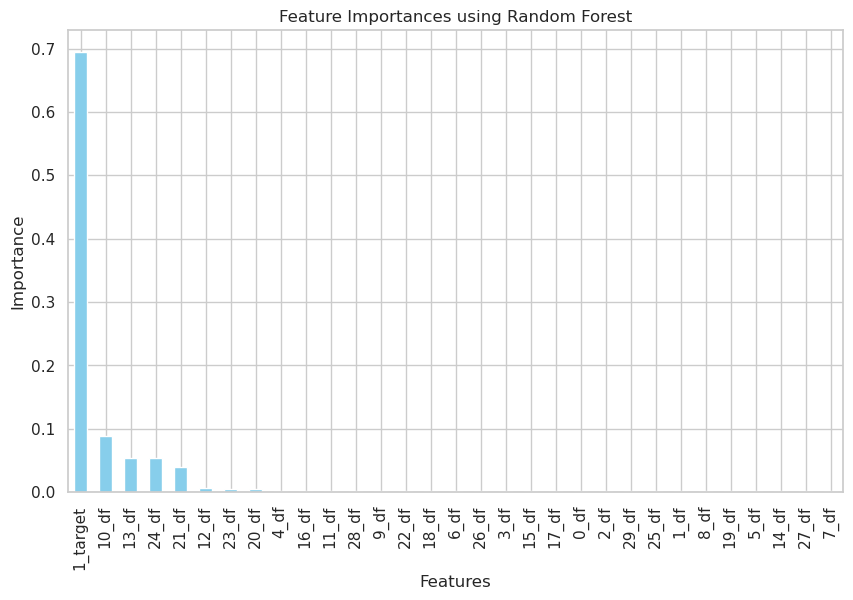

In [118]:
feature_importances = feature_importance_random_forest(first_10000_rows, target_column='0_target')

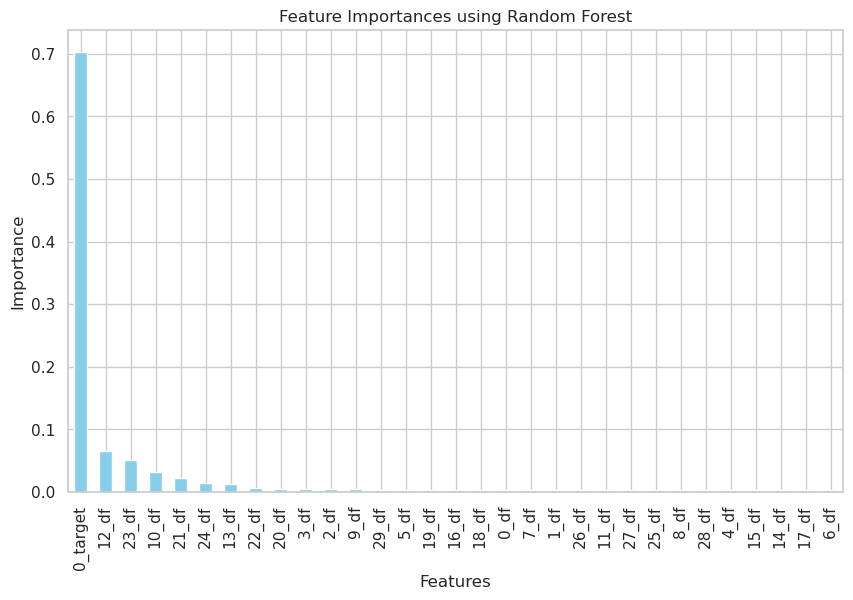

In [119]:
feature_importances = feature_importance_random_forest(first_10000_rows, target_column='1_target')

Судя по графикам мы можем смело исключить признаки 0, 1, 4, 5, 6, 7, 8, 11, 15, 16, 17, 18, 19, 26, 27, 28, 29
Сделаем функцию удаляющую лишние признаки

In [120]:
def remove_columns_with_suffix(df, numbers):
    # Создаем список новых названий столбцов
    columns_to_remove = [str(num) + '_df' for num in numbers]
    
    # Удаляем столбцы, если они существуют
    df.drop(columns=columns_to_remove, inplace=True, errors='ignore')
    
    return df

In [214]:
chunk_size = 1_000_000

df_0 = pd.read_csv('/home/c6/Загрузки/BIG DATA/df_0.csv', chunksize=chunk_size)
df_1 = pd.read_csv('/home/c6/Загрузки/BIG DATA/df_1.csv', chunksize=chunk_size)
df_2 = pd.read_csv('/home/c6/Загрузки/BIG DATA/df_2.csv', chunksize=chunk_size)
df_3 = pd.read_csv('/home/c6/Загрузки/BIG DATA/df_3.csv', chunksize=chunk_size)
target_0 = pd.read_csv('/home/c6/Загрузки/BIG DATA/target_0.csv', chunksize=chunk_size)
target_1 = pd.read_csv('/home/c6/Загрузки/BIG DATA/target_1.csv', chunksize=chunk_size)
target_2 = pd.read_csv('/home/c6/Загрузки/BIG DATA/target_2.csv', chunksize=chunk_size)
target_3 = pd.read_csv('/home/c6/Загрузки/BIG DATA/target_3.csv', chunksize=chunk_size)
df_val = pd.read_csv('/home/c6/Загрузки/BIG DATA/df_val.csv', chunksize=chunk_size)
target_val = pd.read_csv('/home/c6/Загрузки/BIG DATA/target_val.csv', chunksize=chunk_size)

In [215]:
combined_iterator_0 = combine_chunks2(df_0, target_0)
combined_iterator_1 = combine_chunks2(df_1, target_1)
combined_iterator_2 = combine_chunks2(df_2, target_2)
combined_iterator_3 = combine_chunks2(df_3, target_3)
combined_iterator_val = combine_chunks2(df_val, target_val)

In [216]:
def apply_remove_columns_to_iterator(iterator, numbers):
    """
    Применяет функцию remove_columns_with_suffix к каждому чанку в итераторе.
    
    :param iterator: Итератор, возвращающий чанки данных.
    :param numbers: Список номеров столбцов для удаления.
    :return: Генератор, возвращающий обработанные чанки.
    """
    for chunk in iterator:
        # Применяем функцию remove_columns_with_suffix к текущему чанку
        processed_chunk = remove_columns_with_suffix(chunk, numbers)
        yield processed_chunk

Составим список необходимых для удаления колонок, и избавимся от них

In [217]:
numbers = [0, 1, 4, 5, 6, 7, 8, 11, 15, 16, 17, 18, 19, 26, 27, 28, 29]

processed_iterator_0 = apply_remove_columns_to_iterator(combined_iterator_0, numbers)
processed_iterator_1 = apply_remove_columns_to_iterator(combined_iterator_1, numbers)
processed_iterator_2 = apply_remove_columns_to_iterator(combined_iterator_2, numbers)
processed_iterator_3 = apply_remove_columns_to_iterator(combined_iterator_3, numbers)
processed_iterator_val = apply_remove_columns_to_iterator(combined_iterator_val, numbers)

## 2 Оптимизация больших данных и сбор итогового набора

### 1. Проведена оптимизация типов данных для датасета, подсчитан процент оптимизации

In [218]:
def optimize_dataframe_to_iterator(iterator):
    """
    Применяет функцию optimize_dataframe к каждому чанку в итераторе.
    
    :param iterator: Итератор, возвращающий чанки данных.
    :param numbers: Список номеров столбцов для удаления.
    :return: Генератор, возвращающий обработанные чанки.
    """
    for chunk in iterator:
        # Применяем функцию optimize_dataframe к текущему чанку
        processed_chunk = optimize_dataframe2(chunk)
        yield processed_chunk

In [219]:
optimize_iterator_0 = optimize_dataframe_to_iterator(processed_iterator_0)
optimize_iterator_1 = optimize_dataframe_to_iterator(processed_iterator_1)
optimize_iterator_2 = optimize_dataframe_to_iterator(processed_iterator_2)
optimize_iterator_3 = optimize_dataframe_to_iterator(processed_iterator_3)
optimize_iterator_val = optimize_dataframe_to_iterator(processed_iterator_val)

In [222]:
def save_chunk_from_iterator(iterator, output_file):
    """
    Функция для сохранения первого чанка из итератора.

    :param iterator: Итератор, возвращаемый pd.read_csv() с chunksize.
    :param output_file: Путь для сохранения первого чанка.
    """
    try:
        first_chunk = next(iterator)
        
        first_chunk.to_csv(output_file, index=False)
        print(f"Первый чанк сохранен в файл: {output_file}")
    except StopIteration:
        print("Итератор пуст. Нет данных для сохранения.")

In [223]:
save_chunk_from_iterator(optimize_iterator_0, '/home/c6/Загрузки/BIG DATA/optimize_iterator_0.csv')
save_chunk_from_iterator(optimize_iterator_1, '/home/c6/Загрузки/BIG DATA/optimize_iterator_1.csv')
save_chunk_from_iterator(optimize_iterator_2, '/home/c6/Загрузки/BIG DATA/optimize_iterator_2.csv')
save_chunk_from_iterator(optimize_iterator_3, '/home/c6/Загрузки/BIG DATA/optimize_iterator_3.csv')
save_chunk_from_iterator(optimize_iterator_val, '/home/c6/Загрузки/BIG DATA/optimize_iterator_val.csv')


Начальный размер DataFrame: 114.44 MB
Конечный размер DataFrame: 76.29 MB
Размер уменьшился на: 33.33%
Первый чанк сохранен в файл: /home/c6/Загрузки/BIG DATA/optimize_iterator_0.csv
Начальный размер DataFrame: 114.44 MB
Конечный размер DataFrame: 76.29 MB
Размер уменьшился на: 33.33%
Первый чанк сохранен в файл: /home/c6/Загрузки/BIG DATA/optimize_iterator_1.csv
Начальный размер DataFrame: 114.44 MB
Конечный размер DataFrame: 76.29 MB
Размер уменьшился на: 33.33%
Первый чанк сохранен в файл: /home/c6/Загрузки/BIG DATA/optimize_iterator_2.csv
Начальный размер DataFrame: 114.44 MB
Конечный размер DataFrame: 76.29 MB
Размер уменьшился на: 33.33%
Первый чанк сохранен в файл: /home/c6/Загрузки/BIG DATA/optimize_iterator_3.csv
Начальный размер DataFrame: 114.44 MB
Конечный размер DataFrame: 76.29 MB
Размер уменьшился на: 33.33%
Первый чанк сохранен в файл: /home/c6/Загрузки/BIG DATA/optimize_iterator_val.csv


## 2. Подготовлены итоговыеt наборы данных, содержащий объединенные данные из всех загруженных файлов (df_1.csv, df_2.csv…) и (target_1.csv, target_2.csv….)

In [228]:
iterator_0 = pd.read_csv('/home/c6/Загрузки/BIG DATA/optimize_iterator_0.csv')
iterator_1 = pd.read_csv('/home/c6/Загрузки/BIG DATA/optimize_iterator_1.csv')
iterator_2 = pd.read_csv('/home/c6/Загрузки/BIG DATA/optimize_iterator_2.csv')
iterator_3 = pd.read_csv('/home/c6/Загрузки/BIG DATA/optimize_iterator_3.csv')
iterator_val = pd.read_csv('/home/c6/Загрузки/BIG DATA/optimize_iterator_val.csv')

df_main = pd.concat([iterator_0,iterator_1,iterator_2,iterator_3], ignore_index=True)


<bound method NDFrame.head of              2_df      3_df      9_df     10_df       12_df         13_df  \
0        2.019547  0.491340  0.753957  3.781451  351.001982      6.721881   
1        1.315388  0.551132 -0.485462 -0.529432   -0.268868      0.001092   
2        1.279916  0.162176  0.597678  2.411748    0.298283      3.914470   
3        1.726308  0.296178  0.041539 -5.663837   -0.390936     19.939197   
4        2.106271  0.282294  0.950548 -5.008367    0.480440    611.657742   
...           ...       ...       ...       ...         ...           ...   
3999995  2.050641  0.317436  0.450245 -2.541722   -0.255851     14.747875   
3999996  1.220618  0.515841  0.080146  3.481575    0.558507    383.342928   
3999997  1.118895  0.482159  0.035073  8.967927    0.822536      7.196232   
3999998  1.466568  0.531901  0.043380 -1.478861    0.294955      3.574456   
3999999  2.142622  0.703739 -0.134698 -0.639838    0.101540  18625.819597   

             14_df      20_df         21_df  

In [229]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000000 entries, 0 to 3999999
Data columns (total 15 columns):
 #   Column    Dtype  
---  ------    -----  
 0   2_df      float64
 1   3_df      float64
 2   9_df      float64
 3   10_df     float64
 4   12_df     float64
 5   13_df     float64
 6   14_df     float64
 7   20_df     float64
 8   21_df     float64
 9   22_df     float64
 10  23_df     float64
 11  24_df     float64
 12  25_df     float64
 13  0_target  float64
 14  1_target  float64
dtypes: float64(15)
memory usage: 457.8 MB


In [230]:
df_main = optimize_dataframe2(df_main)

Начальный размер DataFrame: 457.76 MB
Конечный размер DataFrame: 305.18 MB
Размер уменьшился на: 33.33%


In [231]:
df_main.head(10)

,2_df,3_df,9_df,10_df,12_df,13_df,14_df,20_df,21_df,22_df,23_df,24_df,25_df,0_target,1_target
0,2.019547,0.491340,0.753957,3.781451,351.001982,6.721881,3.822262,1.421480,4.113250e-01,-0.201946,-1.996009,-0.565032,17.195049,1784.500488,1823.085815
1,1.315388,0.551132,-0.485462,-0.529432,-0.268868,0.001092,0.484737,5.810654,6.751363e+06,0.384998,7.574961,-3.227253,113.134781,2907.738525,4051.863525
2,1.279916,0.162176,0.597678,2.411748,0.298283,3.914470,0.351816,4.917561,3.479585e-01,-0.606219,1.242077,-3.474195,60.911892,1464.805908,2023.473022
3,1.726308,0.296178,0.041539,-5.663837,-0.390936,19.939197,10.021969,-3.411042,3.717021e+06,-0.507997,11.702127,-0.579273,116.612846,2717.503662,2665.618408
4,2.106271,0.282294,0.950548,-5.008367,0.480440,611.657742,1.963020,6.503011,4.112706e+05,-0.835345,2.245303,1.432575,12.964935,2597.352539,3598.380615
5,2.258974,0.315690,-0.093845,15.555885,2.654367,0.000239,-4.934527,0.657722,1.168075e-01,-0.489365,18.329889,-0.351714,13.457225,2780.903320,2523.990479
6,1.088740,0.591378,0.492824,5.340116,0.167400,2.496977,0.278303,-3.853159,1.917468e+03,0.086682,14.141380,-0.210957,20.137445,3924.904541,4314.169434
7,1.786317,0.599643,0.633789,13.712908,0.297363,0.268352,-0.196807,14.075801,3.127652e-01,-0.966522,19.943611,-0.100135,69.919411,3775.686768,2816.368652
8,2.198101,0.610804,0.967293,-4.933195,0.484515,0.002911,0.370715,10.161798,5.880484e-02,0.964144,15.533435,-12.489325,40.585522,955.588928,2761.469727
9,1.346617,0.374029,0.829859,-4.141490,1.527784,1.686318,2.538217,17.849131,4.058252e+00,0.764954,-1.017795,1.131222,41.082844,612.978760,1649.119995


In [232]:
data_y = df_main[['0_target', '1_target']]

data_X = df_main.drop(columns=['0_target', '1_target'])

In [233]:
data_y.head()

,0_target,1_target
0,1784.500488,1823.085815
1,2907.738525,4051.863525
2,1464.805908,2023.473022
3,2717.503662,2665.618408
4,2597.352539,3598.380615


In [234]:
data_X.head()

,2_df,3_df,9_df,10_df,12_df,13_df,14_df,20_df,21_df,22_df,23_df,24_df,25_df
0,2.019547,0.491340,0.753957,3.781451,351.001982,6.721881,3.822262,1.421480,4.113250e-01,-0.201946,-1.996009,-0.565032,17.195049
1,1.315388,0.551132,-0.485462,-0.529432,-0.268868,0.001092,0.484737,5.810654,6.751363e+06,0.384998,7.574961,-3.227253,113.134781
2,1.279916,0.162176,0.597678,2.411748,0.298283,3.914470,0.351816,4.917561,3.479585e-01,-0.606219,1.242077,-3.474195,60.911892
3,1.726308,0.296178,0.041539,-5.663837,-0.390936,19.939197,10.021969,-3.411042,3.717021e+06,-0.507997,11.702127,-0.579273,116.612846
4,2.106271,0.282294,0.950548,-5.008367,0.480440,611.657742,1.963020,6.503011,4.112706e+05,-0.835345,2.245303,1.432575,12.964935


In [235]:
iterator_val.head()

,2_df,3_df,9_df,10_df,12_df,13_df,14_df,20_df,21_df,22_df,23_df,24_df,25_df,0_target,1_target
0,2.524047,0.824580,0.222101,-3.486776,0.158634,146.662286,0.120122,4.338649,5.456257e+07,0.914310,3.761569,-0.367973,30.509745,3274.8188,3877.1777
1,1.462263,0.774056,-0.830449,7.223824,-0.672983,0.003277,0.063088,6.674130,4.747141e+03,0.855418,5.652377,-1.066825,23.284689,2863.5935,3277.2405
2,1.850483,0.608813,-0.279799,4.470769,-0.073666,19.324159,-0.421158,10.028034,5.028991e+06,-0.351430,13.414969,1.482381,81.963960,4026.0098,3668.2607
3,1.805363,0.824748,0.470265,0.022261,0.536433,15.424951,-6.224386,11.636107,2.914323e+01,0.030716,7.902884,3.359541,161.684040,1402.2535,1695.4224
4,1.313591,0.717807,0.983283,3.355497,0.238369,304.271184,-1.709609,4.227630,2.731110e+07,0.157248,10.389349,-0.156829,35.610466,4963.4824,5240.4844


In [236]:
data_y_val = iterator_val[['0_target', '1_target']]

data_X_val = iterator_val.drop(columns=['0_target', '1_target'])

In [212]:
from sklearn.preprocessing import StandardScaler
import os

def standardize_chunks(chunk, output_directory):
    """
    Стандартизирует данные из итератора чанков и сохраняет каждый стандартизованный чанк на диск.

    Параметры:
        chunk_iterator: Итератор чанков (например, результат pd.read_csv с параметром chunksize).
        output_directory (str): Директория для сохранения стандартизованных чанков.

    Возвращает:
        None
    """
    # Создаем директорию для сохранения файлов, если её нет
    os.makedirs(output_directory, exist_ok=True)

    # Применяем стандартизацию к текущему чанку
    scaler = StandardScaler()
    standardized_data = scaler.fit_transform(chunk)
    df_standardized = pd.DataFrame(standardized_data, columns=chunk.columns)
    output_file_path = os.path.join(output_directory, f"standardized_chunk_{i + 1}.csv")
    # Сохраняем стандартизованный чанк в файл
    df_standardized.to_csv(output_file_path, index=False)

    print(f"Чанк {i + 1} обработан и сохранен в {output_file_path}")

In [159]:
print(next(optimize_iterator_0).head(1000))

Начальный размер DataFrame: 114.44 MB
Конечный размер DataFrame: 76.29 MB
Размер уменьшился на: 33.33%
             2_df      3_df      9_df     10_df     12_df       13_df  \
4000000  1.162118  0.457995 -0.357318  0.002807  1.504434    0.260806   
4000001  1.329614  0.626425 -0.762020 -4.944394 -0.413571   18.354195   
4000002  1.650262  0.350529 -0.721045 -1.865867 -0.378673    0.035274   
4000003  2.175209  0.148674 -0.760213 -1.411406 -0.361907    3.910687   
4000004  1.325524  0.174342  0.601920 -5.198739  0.371266   25.165090   
...           ...       ...       ...       ...       ...         ...   
4000995  1.133789  0.491830  0.782838  5.670229 -0.137040    9.414255   
4000996  1.715869  0.806140  0.879547  9.127567  0.160974  476.699295   
4000997  1.406821  0.838950  0.605252 -1.074256  0.111266    0.051279   
4000998  2.532973  0.625161  0.612746  5.117023  0.152217   26.229810   
4000999  2.219107  0.208678 -0.177254 -2.456842 -0.167669    3.413473   

            14_df   

## 3. Итоговые наборы данных сохранены на диск с максимальным сжатием. Названия файлов – ‘data_X’ и ‘data_y’, ‘data_X_val’, ‘data_y_val’ Процент сжатия относительно памяти, занимаемой наборами в Python подсчитан и продемонстрирован с использованием скриншотов.

In [238]:
def get_file_size_gb(file_path):
    return os.path.getsize(file_path) / (1024 ** 3)


Размер до сохранения: 0.268221 ГБ
Размер после сохранения: 0.251918 ГБ
Разница в размере: 6.08%


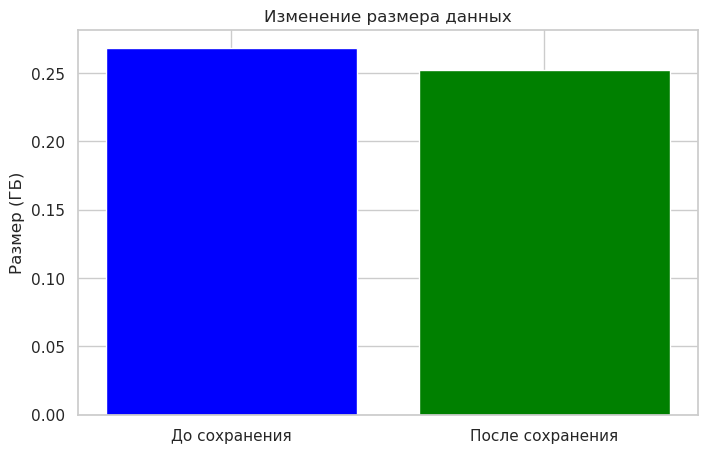

In [246]:
size_before = data_X.memory_usage(deep=True).sum() / (1024 ** 3)

# Сохраняем data_X в сжатом формате gzip
file_path = 'data_X'
data_X.to_pickle(file_path, compression='gzip')

# Размер data_X после сохранения (на диске)
size_after = get_file_size_gb(file_path)

# Разница в процентах
size_difference_percent = ((size_before - size_after) / size_before) * 100

# Выводим информацию
print(f"Размер до сохранения: {size_before:.6f} ГБ")
print(f"Размер после сохранения: {size_after:.6f} ГБ")
print(f"Разница в размере: {size_difference_percent:.2f}%")

# График изменения размера
sizes = [size_before, size_after]
labels = ['До сохранения', 'После сохранения']

plt.figure(figsize=(8, 5))
plt.bar(labels, sizes, color=['blue', 'green'])
plt.title('Изменение размера данных')
plt.ylabel('Размер (ГБ)')
plt.show()


Размер до сохранения: 0.029802 ГБ
Размер после сохранения: 0.026301 ГБ
Разница в размере: 11.75%


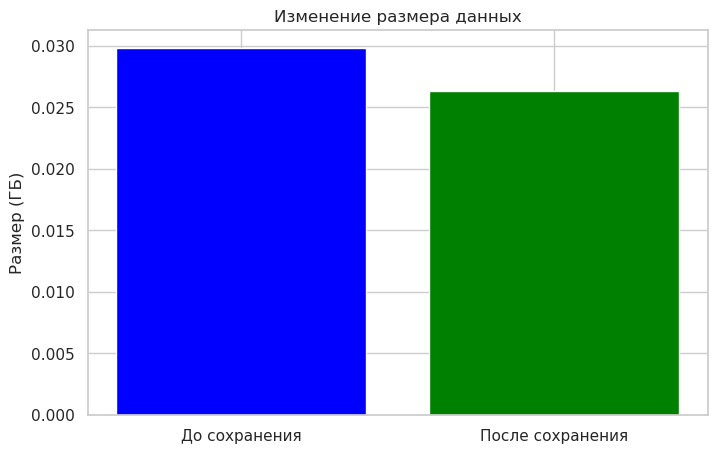

In [245]:
size_before = data_y.memory_usage(deep=True).sum() / (1024 ** 3)

file_path = 'data_y'
data_y.to_pickle(file_path, compression='gzip')

# Размер data_X после сохранения (на диске)
size_after = get_file_size_gb(file_path)

# Разница в процентах
size_difference_percent = ((size_before - size_after) / size_before) * 100

# Выводим информацию
print(f"Размер до сохранения: {size_before:.6f} ГБ")
print(f"Размер после сохранения: {size_after:.6f} ГБ")
print(f"Разница в размере: {size_difference_percent:.2f}%")

# График изменения размера
sizes = [size_before, size_after]
labels = ['До сохранения', 'После сохранения']

plt.figure(figsize=(8, 5))
plt.bar(labels, sizes, color=['blue', 'green'])
plt.title('Изменение размера данных')
plt.ylabel('Размер (ГБ)')
plt.show()

Размер до сохранения: 0.096858 ГБ
Размер после сохранения: 0.089974 ГБ
Разница в размере: 7.11%


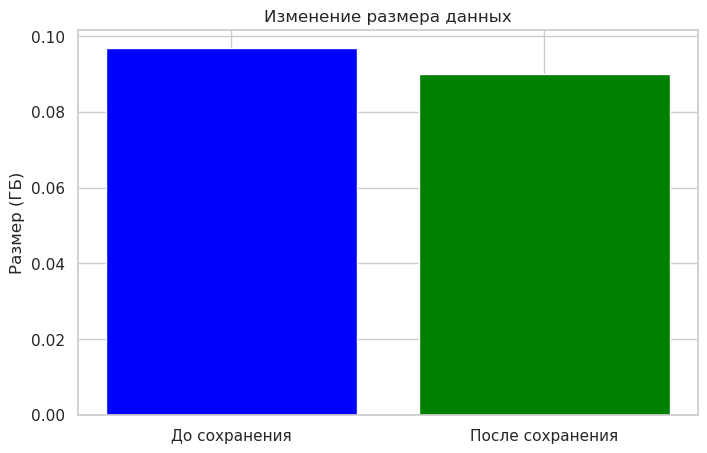

In [244]:
size_before = data_X_val.memory_usage(deep=True).sum() / (1024 ** 3)

file_path = 'data_X_val'
data_X_val.to_pickle(file_path, compression='gzip')

# Размер data_X после сохранения (на диске)
size_after = get_file_size_gb(file_path)

# Разница в процентах
size_difference_percent = ((size_before - size_after) / size_before) * 100

# Выводим информацию
print(f"Размер до сохранения: {size_before:.6f} ГБ")
print(f"Размер после сохранения: {size_after:.6f} ГБ")
print(f"Разница в размере: {size_difference_percent:.2f}%")

# График изменения размера
sizes = [size_before, size_after]
labels = ['До сохранения', 'После сохранения']

plt.figure(figsize=(8, 5))
plt.bar(labels, sizes, color=['blue', 'green'])
plt.title('Изменение размера данных')
plt.ylabel('Размер (ГБ)')
plt.show()

Размер до сохранения: 0.014901 ГБ
Размер после сохранения: 0.008633 ГБ
Разница в размере: 42.06%


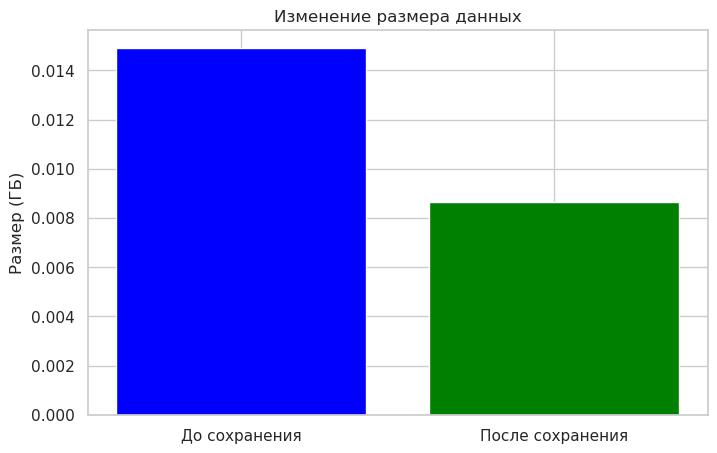

In [243]:
size_before = data_y_val.memory_usage(deep=True).sum() / (1024 ** 3)

file_path = 'data_y_val'
data_y_val.to_pickle(file_path, compression='gzip')

# Размер data_X после сохранения (на диске)
size_after = get_file_size_gb(file_path)

# Разница в процентах
size_difference_percent = ((size_before - size_after) / size_before) * 100

# Выводим информацию
print(f"Размер до сохранения: {size_before:.6f} ГБ")
print(f"Размер после сохранения: {size_after:.6f} ГБ")
print(f"Разница в размере: {size_difference_percent:.2f}%")

# График изменения размера
sizes = [size_before, size_after]
labels = ['До сохранения', 'После сохранения']

plt.figure(figsize=(8, 5))
plt.bar(labels, sizes, color=['blue', 'green'])
plt.title('Изменение размера данных')
plt.ylabel('Размер (ГБ)')
plt.show()